## PCA on the Iris dataset and visualize it in 2D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (species)

In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D
X_pca = pca.fit_transform(X_scaled)

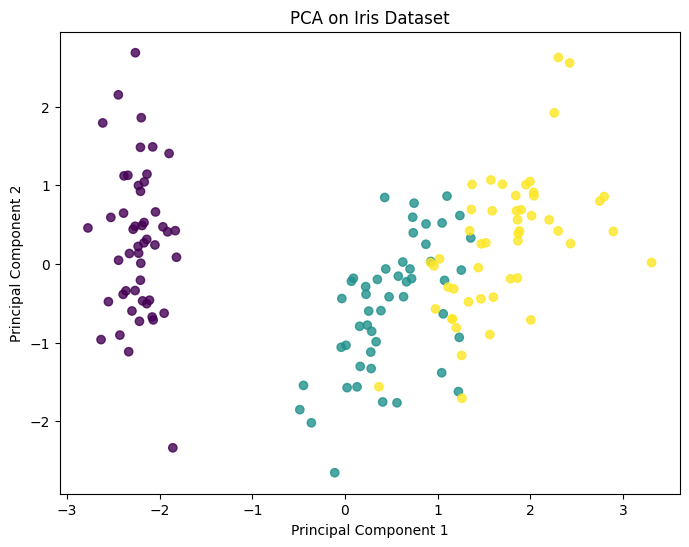

In [6]:
# Visualize the reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset")
#plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
plt.show()

Explained variance to know the variance of each componen, and choose how many to consider

In [7]:
# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance for each principal component
for i, var in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {var:.2%} variance explained")

Principal Component 1: 72.96% variance explained
Principal Component 2: 22.85% variance explained


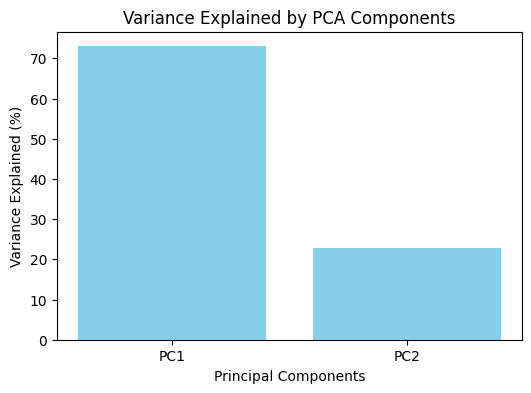

In [8]:
# Plot variance explained
plt.figure(figsize=(6, 4))
plt.bar(range(1, 3), explained_variance * 100, tick_label=['PC1', 'PC2'], color='skyblue')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained (%)")
plt.title("Variance Explained by PCA Components")
plt.show()

Finding optimal no. of components using cumulative variance

In [9]:
# Apply PCA without specifying components (keeps all)
pca = PCA()
pca.fit(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

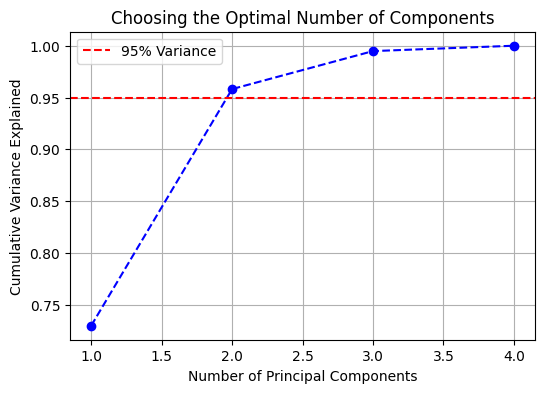

Optimal number of components: 2


In [10]:
# Plot cumulative variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Choosing the Optimal Number of Components")
plt.legend()
plt.grid()
plt.show()

# Find the minimum number of components that explain 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {num_components}")

### Use PCA-Transformed Data for Machine Learning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier on PCA-reduced data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with PCA-transformed features: {accuracy:.2f}")

Accuracy with PCA-transformed features: 0.90


### PCA for Data Visualization (in 3D)

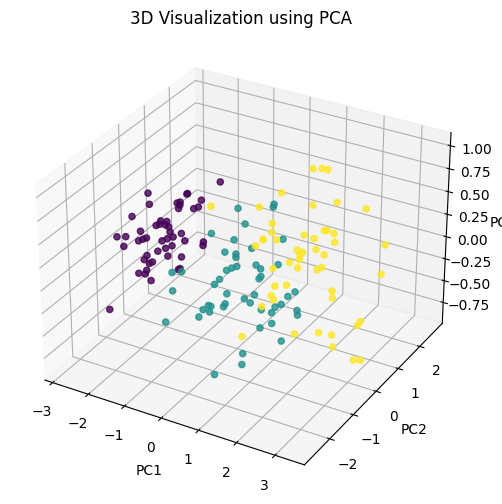

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.8)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D Visualization using PCA")
plt.show()

To automatically choose components

In [13]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components selected: {pca.n_components_}")


Number of components selected: 2
